In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("titanic_data/train.csv")

test_data = pd.read_csv("titanic_data/test.csv")

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print train_data.shape

(891, 12)


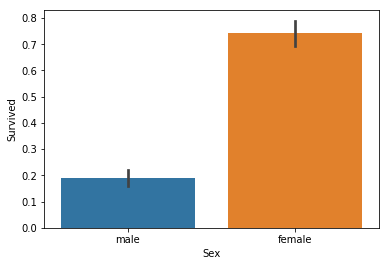

In [4]:
# Survived vs Gender

sns.barplot(x="Sex", y="Survived", data=train_data)

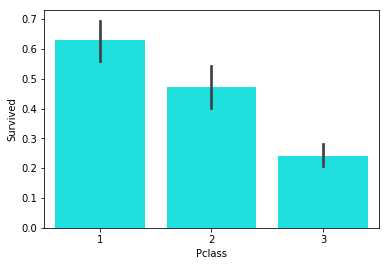

In [5]:
# Survived vs Pclass

sns.barplot(x="Pclass", y="Survived", data=train_data, color="aqua")

[Text(0,0.5,'Population Density'), Text(0.5,0,'Fare')]

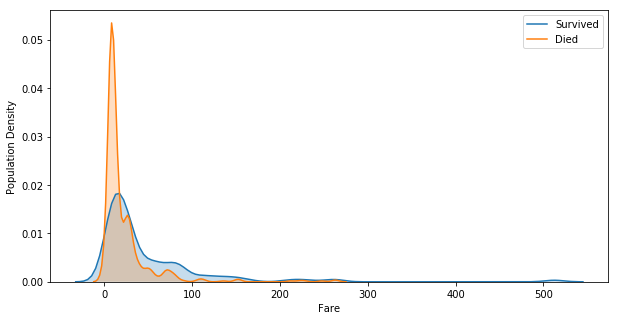

In [6]:
# Survived vs Died Fare Distribution

plt.figure(figsize=(10,5))

ax = sns.kdeplot(train_data["Fare"][train_data.Survived==1], shade=True)
sns.kdeplot(train_data["Fare"][train_data.Survived==0], shade=True)

plt.legend(['Survived', 'Died'])

ax.set(xlabel='Fare', ylabel='Population Density')

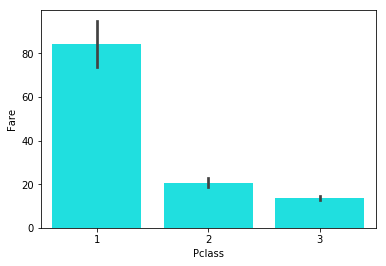

In [7]:
# Pclass vs Fare

sns.barplot(x="Pclass", y="Fare", data=train_data, color="aqua")

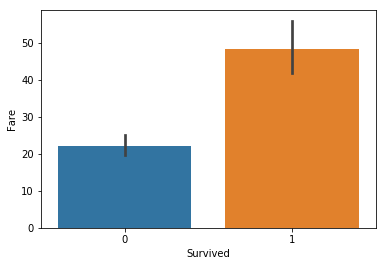

In [8]:
# Fare vs Survived

ax = sns.barplot(x="Survived", y="Fare", data=train_data)

[Text(0,0,'Southampton'), Text(0,0,'Cherbourg'), Text(0,0,'Queenstown')]

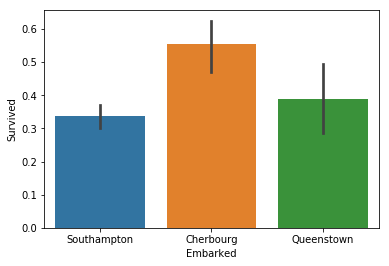

In [9]:
# Embarked vs Survived 
# Southampton -> Cherbourg -> Queenstown

ax = sns.barplot(x="Embarked", y="Survived", data=train_data)

ax.set_xticklabels(labels=["Southampton", "Cherbourg", "Queenstown"])

In [19]:
### Data cleasing and preprocessing
# check missing entries in training data

print train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

mode  24.0


/home/wuym0404/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


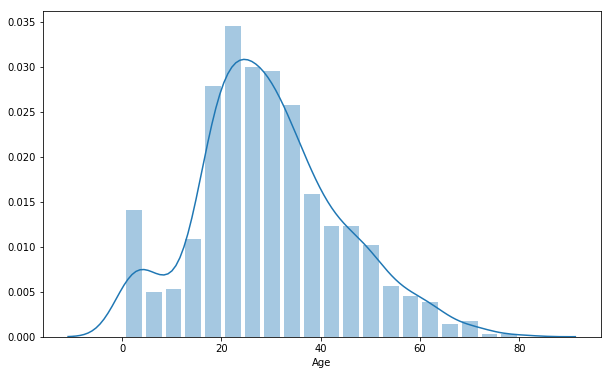

In [11]:
# Age: missing value 

plt.figure(figsize=(10,6))

#ax = sns.kdeplot(train_data["Age"], shade=True, color="r")
sns.distplot(train_data["Age"].dropna(), bins=20, hist_kws={"rwidth":0.8})
print train_data["Age"].describe()
print
print "mode ", train_data["Age"].mode().iloc[0]

[Text(0,0,'Southampton'), Text(0,0,'Cherbourg'), Text(0,0,'Queenstown')]

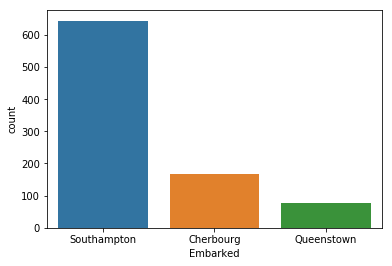

In [12]:
# Embarked Port: missing value 

ax = sns.countplot(x="Embarked", data=train_data)

ax.set_xticklabels(labels=["Southampton", "Cherbourg", "Queenstown"])

In [27]:
# filling or droping missing values
full_train_data = train_data.copy()

train_age_median = train_data["Age"].median()
train_embarked_mode = train_data["Embarked"].mode().iloc[0]

full_train_data["Age"].fillna(train_age_median, inplace=True)
full_train_data["Embarked"].fillna(train_embarked_mode, inplace=True)

In [28]:
full_train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [29]:
# Get dummy columns

full_train_data = pd.get_dummies(full_train_data, columns=["Pclass", "Sex", "Embarked"])
full_train_data.drop("PassengerId", axis=1, inplace=True)
full_train_data.drop("Name", axis=1, inplace=True)
full_train_data.drop("Ticket", axis=1, inplace=True)
full_train_data.drop("Sex_female", axis=1, inplace=True)

full_train_data.drop("Cabin", axis=1, inplace=True)

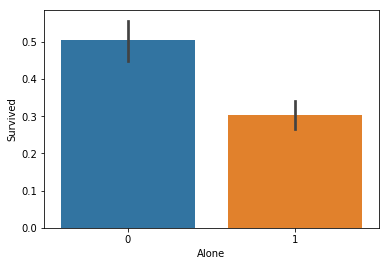

In [30]:
# Merge "SibSp" and "Parch" into a new feature -> "Alone"

full_train_data['Alone'] = np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)

full_train_data.drop('SibSp', axis=1, inplace=True)
full_train_data.drop('Parch', axis=1, inplace=True)

ax = sns.barplot(x="Alone", y="Survived", data=full_train_data)

In [31]:
# Data cleasing and preprocessing complete

full_train_data.isnull().sum()


Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Alone         0
dtype: int64

In [32]:
full_train_data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Alone
0,0,22.0,7.2500,0,0,1,1,0,0,1,0
1,1,38.0,71.2833,1,0,0,0,1,0,0,0
2,1,26.0,7.9250,0,0,1,0,0,0,1,1
3,1,35.0,53.1000,1,0,0,0,0,0,1,0
4,0,35.0,8.0500,0,0,1,1,0,0,1,1


In [33]:
# Data cleasing and preprocessing to test data

test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [34]:
full_test_data = test_data.copy()

test_age_median = test_data["Age"].median()
test_fare_median = test_data["Fare"].median()

full_test_data["Age"].fillna(test_age_median, inplace=True)
full_test_data["Fare"].fillna(test_fare_median, inplace=True)

full_test_data = pd.get_dummies(full_test_data, columns=["Pclass", "Sex", "Embarked"])
full_test_data.drop("PassengerId", axis=1, inplace=True)
full_test_data.drop("Name", axis=1, inplace=True)
full_test_data.drop("Ticket", axis=1, inplace=True)
full_test_data.drop("Sex_female", axis=1, inplace=True)

full_test_data.drop("Cabin", axis=1, inplace=True)

full_test_data['Alone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)
full_test_data.drop('SibSp', axis=1, inplace=True)
full_test_data.drop('Parch', axis=1, inplace=True)

#full_test_data.head()
full_test_data.isnull().sum()

Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Alone         0
dtype: int64

Optimal number of features: 8
Selected features: ['Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_S', 'Embarked_Q', 'Sex_male']


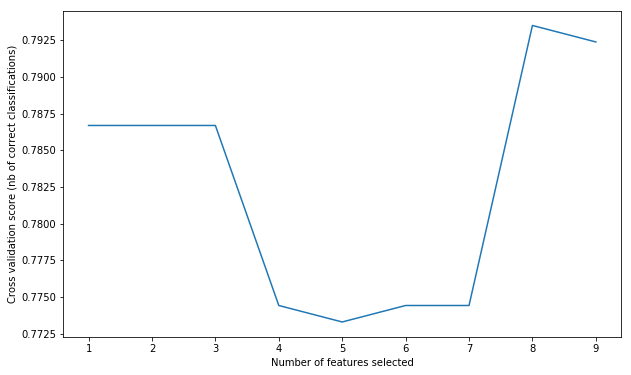

In [35]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

features = ["Age","Fare","Pclass_1","Pclass_2","Pclass_3","Embarked_C","Embarked_S","Embarked_Q","Sex_male"]

X = full_train_data[features]
y = full_train_data["Survived"]

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [38]:
optimal_features = ['Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_S', 'Embarked_Q', 'Sex_male']
X_optimal = full_train_data[optimal_features]

logreg = LogisticRegression()

logreg.fit(X_optimal, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
y_test_pred = logreg.predict(full_test_data[optimal_features])

In [51]:
import csv

file_name = "submission.csv"
with open(file_name, mode='w') as submission_file:
    fieldnames = ['PassengerId', 'Survived']
    writer = csv.DictWriter(submission_file, fieldnames=fieldnames)

    writer.writerow({'PassengerId': 'PassengerId', 'Survived': 'Survived'})
    for i in range(len(y_test_pred)):
        writer.writerow({'PassengerId': test_data['PassengerId'][i], 'Survived': y_test_pred[i]})
print "done"

done
